In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
coltri = ["darkred", "skyblue", "orange"]

In [3]:
def fitExp(t, a, b, c):
    return a*np.exp(b*t) + c

def fitPowerlaw(t, a, b, c):
    return a*t**(b) + c

def fitAlgebraic(t, a, b, c):
    return a*t + b*t**(2) 

In [13]:
data = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-30.csv',sep=';') 

In [14]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
1,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
2,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
3,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,26/03/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0


In [15]:
# data[['CountryExp','NewConfCases']]

In [16]:
lastxdays = 36 #days since 20 february

In [19]:
england = data[data.countriesAndTerritories =='United_Kingdom']
england

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7351,30/03/2020,30,3,2020,2433,209,United_Kingdom,UK,GBR,66488991.0
7352,29/03/2020,29,3,2020,2546,260,United_Kingdom,UK,GBR,66488991.0
7353,28/03/2020,28,3,2020,2885,181,United_Kingdom,UK,GBR,66488991.0
7354,27/03/2020,27,3,2020,2129,115,United_Kingdom,UK,GBR,66488991.0
7355,26/03/2020,26,3,2020,1452,41,United_Kingdom,UK,GBR,66488991.0
...,...,...,...,...,...,...,...,...,...,...
7437,04/01/2020,4,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7438,03/01/2020,3,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7439,02/01/2020,2,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7440,01/01/2020,1,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0


In [21]:
newcases_UK = np.flip(england.cases.to_numpy()[:lastxdays])

In [22]:
ydata_UK = np.cumsum(newcases_UK)
t = np.arange(1,len(ydata_UK)+1,1)
xdata = t
xdata,ydata_UK

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    4,     4,     4,     4,     7,     9,    14,    27,    31,
           42,    76,   106,   154,   197,   264,   312,   364,   447,
          581,   698,  1131,  1382,  1534,  1941,  2621,  3268,  3974,
         5009,  5674,  6641,  8068,  9520, 11649, 14534, 17080, 19513]))

In [23]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

# func = fitAlgebraic
# func = fitPowerlaw
func = fitExp

popt_UK, pcov_UK = curve_fit(func, xdata[5:], ydata_UK[5:]+1, x0,maxfev = 5000)

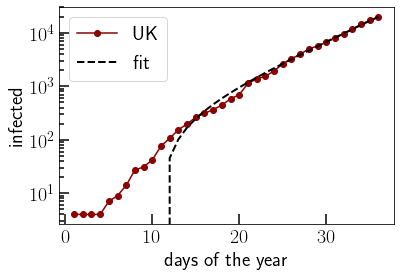

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata[:],ydata_UK[:], 'o-', color=coltri[0],  label=r'UK')
plt.plot(xdata[10:], func(xdata, *popt_UK)[10:], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days of the year", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [44]:
popt_UK

array([  13.48910896,    0.18320575, -149.19666265])

In [25]:
italy = data[data.countriesAndTerritories =='Italy']

In [26]:
italy

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
3741,30/03/2020,30,3,2020,5217,758,Italy,IT,ITA,60431283.0
3742,29/03/2020,29,3,2020,5974,887,Italy,IT,ITA,60431283.0
3743,28/03/2020,28,3,2020,5959,971,Italy,IT,ITA,60431283.0
3744,27/03/2020,27,3,2020,6153,660,Italy,IT,ITA,60431283.0
3745,26/03/2020,26,3,2020,5210,685,Italy,IT,ITA,60431283.0
...,...,...,...,...,...,...,...,...,...,...
3827,04/01/2020,4,1,2020,0,0,Italy,IT,ITA,60431283.0
3828,03/01/2020,3,1,2020,0,0,Italy,IT,ITA,60431283.0
3829,02/01/2020,2,1,2020,0,0,Italy,IT,ITA,60431283.0
3830,01/01/2020,1,1,2020,0,0,Italy,IT,ITA,60431283.0


In [27]:
# cases_it[["DateRep", "NewConfCases"]].to_numpy()
newcases_IT = np.flip(italy.cases.to_numpy()[:lastxdays])

In [28]:
ydata_IT = np.cumsum(newcases_IT)
t = np.arange(1,len(ydata_IT)+1,1)
xdata = t
xdata,ydata_IT

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   53,   150,   243,   321,   571,   809,  1049,  1610,  1756,
         2423,  3010,  3779,  4557,  5804,  7296,  9093, 10070, 12383,
        15034, 17581, 17671, 23901, 27901, 31427, 35634, 40956, 46942,
        53499, 59059, 63848, 69097, 74307, 80460, 86419, 92393, 97610]))

In [35]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

# func = fitAlgebraic
# func = fitPowerlaw
func = fitExp

popt_IT, pcov_IT = curve_fit(func, xdata[10:], ydata_IT[10:]+1, x0,maxfev = 5000)
A_IT, B_IT, C_IT = popt_IT[0], popt_IT[1], popt_IT[2]
x_IT = np.array([A_IT, B_IT, C_IT])
curve_IT = func(t, A_IT, B_IT, C_IT)
popt_IT,pcov_IT

(array([ 1.26532250e+04,  6.42350511e-02, -2.60613696e+04]),
 array([[ 6.92109250e+06, -1.29975415e+01, -1.26114279e+07],
        [-1.29975415e+01,  2.45461904e-05,  2.34464078e+01],
        [-1.26114279e+07,  2.34464078e+01,  2.36112006e+07]]))

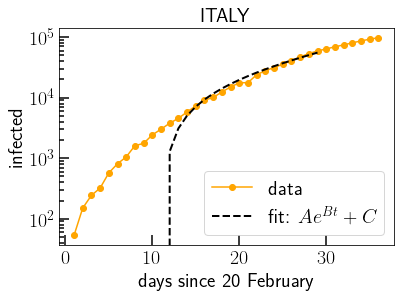

In [34]:
coltri = ["darkred", "skyblue", "orange"]


fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(60e+6, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")


In [51]:
newdeaths_IT = np.flip(italy.Deaths.to_numpy()[:lastxdays])
ydata_deaths_IT = np.cumsum(newdeaths_IT)
popt_deaths_IT = curve_fit(func, xdata, ydata_deaths_IT, x0,maxfev = 5000)[0]

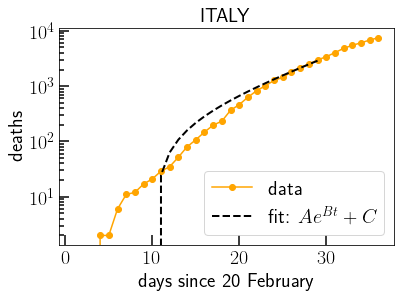

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_deaths_IT, 'o-', color=coltri[2],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_deaths_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"deaths", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [53]:
popt_deaths_IT

array([ 5.78552629e+01,  1.37497440e-01, -2.37857193e+02])

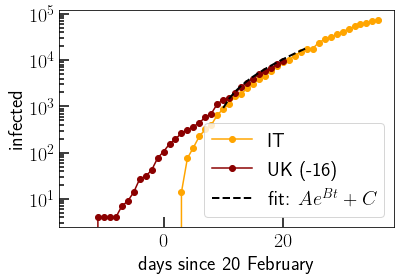

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
# plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (+9)')
plt.plot(xdata-16,ydata_UK, 'o-', color=coltri[0],  label=r'UK (-16)')


plt.plot(np.arange(10,25), func(np.arange(10,25), *popt_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [57]:
newdeaths_UK = np.flip(england.Deaths.to_numpy()[:lastxdays])
ydata_deaths_UK = np.cumsum(newdeaths_UK)
popt_deaths_UK = curve_fit(func, xdata, ydata_deaths_UK, x0,maxfev = 5000)[0]

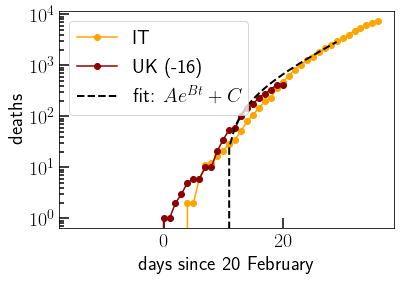

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_deaths_IT, 'o-', color=coltri[2],  label=r'IT')
plt.plot(xdata-16,ydata_deaths_UK, 'o-', color=coltri[0],  label=r'UK (-16)')
plt.plot(np.arange(10,30), func(np.arange(10,30), *popt_deaths_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"deaths", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
# plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [59]:
popt_deaths_IT

array([ 5.78552629e+01,  1.37497440e-01, -2.37857193e+02])

In [61]:
germany = data[data.Countries =='Germany']
germany

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId,CountryCode,Pop_Data.2018
2462,26/03/2020,26,3,2020,4954,49,Germany,DE,DEU,82927922.0
2463,25/03/2020,25,3,2020,2342,23,Germany,DE,DEU,82927922.0
2464,24/03/2020,24,3,2020,4438,32,Germany,DE,DEU,82927922.0
2465,23/03/2020,23,3,2020,3311,27,Germany,DE,DEU,82927922.0
2466,22/03/2020,22,3,2020,3276,22,Germany,DE,DEU,82927922.0
...,...,...,...,...,...,...,...,...,...,...
2544,04/01/2020,4,1,2020,0,0,Germany,DE,DEU,82927922.0
2545,03/01/2020,3,1,2020,0,0,Germany,DE,DEU,82927922.0
2546,02/01/2020,2,1,2020,0,0,Germany,DE,DEU,82927922.0
2547,01/01/2020,1,1,2020,0,0,Germany,DE,DEU,82927922.0


In [65]:
newcases_DE = np.flip(germany.Cases.to_numpy()[:lastxdays])
newcases_DE

array([   0,    0,    0,    0,    0,    0,    2,    4,   26,   10,   54,
         18,   28,   39,   66,  138,  284,  163,   55,  237,  157,  271,
        802,  693,  733, 1043, 1174, 1144, 1042, 5940, 4049, 3276, 3311,
       4438, 2342, 4954])

In [66]:
ydata_DE = np.cumsum(newcases_DE)
t = np.arange(1,len(ydata_DE)+1,1)
xdata = t
xdata,ydata_DE

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     2,     6,    32,
           42,    96,   114,   142,   181,   247,   385,   669,   832,
          887,  1124,  1281,  1552,  2354,  3047,  3780,  4823,  5997,
         7141,  8183, 14123, 18172, 21448, 24759, 29197, 31539, 36493]))

In [67]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
popt_DE, pcov_DE = curve_fit(func, xdata, ydata_DE, x0,maxfev = 5000)
A_DE, B_DE, C_DE = popt_DE[0], popt_DE[1], popt_DE[2]
x_DE = np.array([A_DE, B_DE, C_DE])
curve_DE = fitExp(t, A_DE, B_DE, C_DE)
x_DE,curve_DE

(array([ 6.38152717e+01,  1.78699893e-01, -6.55084617e+02]),
 array([-5.78783130e+02, -5.63853839e+02, -5.46003455e+02, -5.24660431e+02,
        -4.99141392e+02, -4.68629250e+02, -4.32147046e+02, -3.88526665e+02,
        -3.36371439e+02, -2.74011425e+02, -1.99449934e+02, -1.10299602e+02,
        -3.70595107e+00,  1.23744013e+02,  2.76131074e+02,  4.58334472e+02,
         6.76188126e+02,  9.36667433e+02,  1.24811261e+03,  1.62049572e+03,
         2.06574001e+03,  2.59810163e+03,  3.23462612e+03,  3.99569417e+03,
         4.90567422e+03,  5.99370265e+03,  7.29461676e+03,  8.85007015e+03,
         1.07098665e+04,  1.29335540e+04,  1.55923323e+04,  1.87713322e+04,
         2.25723411e+04,  2.71170625e+04,  3.25510126e+04,  3.90481795e+04]))

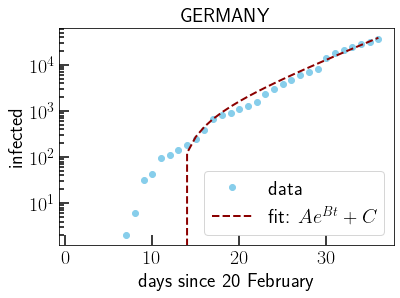

In [69]:

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_DE, 'o', color=coltri[1],  label=r'data')
plt.plot(t, func(t, *popt_DE), '--',color=coltri[0], lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('GERMANY',fontsize = 20)
plt.show()

In [70]:
popt_DE

array([ 6.38152717e+01,  1.78699893e-01, -6.55084617e+02])

In [71]:
usa = data[data.Countries =='United_States_of_America']
usa

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId,CountryCode,Pop_Data.2018
6709,26/03/2020,26,3,2020,13963,249,United_States_of_America,US,USA,327167434.0
6710,25/03/2020,25,3,2020,8789,211,United_States_of_America,US,USA,327167434.0
6711,24/03/2020,24,3,2020,11236,119,United_States_of_America,US,USA,327167434.0
6712,23/03/2020,23,3,2020,8459,131,United_States_of_America,US,USA,327167434.0
6713,22/03/2020,22,3,2020,7123,80,United_States_of_America,US,USA,327167434.0
...,...,...,...,...,...,...,...,...,...,...
6791,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0
6792,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0
6793,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0
6794,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0


In [73]:
newcases_US = np.flip(usa.Cases.to_numpy()[:lastxdays])
newcases_US

array([    0,     1,    19,     0,     0,    18,     0,     6,     1,
           6,     3,    20,    14,    22,    34,    74,   105,    95,
         121,   200,   271,   287,   351,   511,   777,   823,   887,
        1766,  2988,  4835,  5374,  7123,  8459, 11236,  8789, 13963])

In [74]:
ydata_US = np.cumsum(newcases_US)
t = np.arange(1,len(ydata_US)+1,1)
xdata = t
xdata,ydata_US

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     1,    20,    20,    20,    38,    38,    44,    45,
           51,    54,    74,    88,   110,   144,   218,   323,   418,
          539,   739,  1010,  1297,  1648,  2159,  2936,  3759,  4646,
         6412,  9400, 14235, 19609, 26732, 35191, 46427, 55216, 69179]))

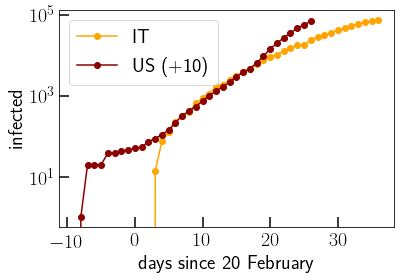

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
# plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (+9)')
plt.plot(xdata-10,ydata_US, 'o-', color=coltri[0],  label=r'US (+10)')


# plt.plot(np.arange(10,20), func(np.arange(10,20)+10, 1.10748188e+02,  2.11390555e-01, 1000), '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [79]:
switzerland = data[data.Countries =='Switzerland']
switzerland

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId,CountryCode,Pop_Data.2018
6192,26/03/2020,26,3,2020,925,17,Switzerland,CH,CHE,8516543.0
6193,25/03/2020,25,3,2020,774,20,Switzerland,CH,CHE,8516543.0
6194,24/03/2020,24,3,2020,1044,6,Switzerland,CH,CHE,8516543.0
6195,23/03/2020,23,3,2020,894,4,Switzerland,CH,CHE,8516543.0
6196,22/03/2020,22,3,2020,1237,13,Switzerland,CH,CHE,8516543.0
...,...,...,...,...,...,...,...,...,...,...
6274,04/01/2020,4,1,2020,0,0,Switzerland,CH,CHE,8516543.0
6275,03/01/2020,3,1,2020,0,0,Switzerland,CH,CHE,8516543.0
6276,02/01/2020,2,1,2020,0,0,Switzerland,CH,CHE,8516543.0
6277,01/01/2020,1,1,2020,0,0,Switzerland,CH,CHE,8516543.0


In [81]:
newcases_CH = np.flip(switzerland.Cases.to_numpy()[:lastxdays])
newcases_CH

array([   0,    0,    0,    0,    0,    0,    1,    0,    7,    4,    6,
          6,    6,    7,   20,   30,  122,   55,   68,   42,  116,  152,
        212,  267,  238,  841,    0,  450,  360,  878,  952, 1237,  894,
       1044,  774,  925])

In [82]:
ydata_CH = np.cumsum(newcases_CH)
t = np.arange(1,len(ydata_CH)+1,1)
xdata = t
xdata,ydata_CH

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   0,    0,    0,    0,    0,    0,    1,    1,    8,   12,   18,
          24,   30,   37,   57,   87,  209,  264,  332,  374,  490,  642,
         854, 1121, 1359, 2200, 2200, 2650, 3010, 3888, 4840, 6077, 6971,
        8015, 8789, 9714]))

In [83]:
popt_IT

array([ 1.55144852e+03,  1.10619016e-01, -3.76306908e+03])

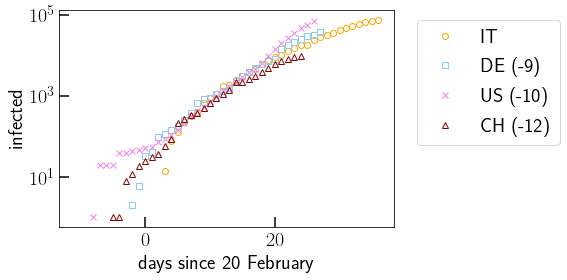

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o', color=coltri[2],  label=r'IT', fillstyle='none')
plt.plot(xdata-9,ydata_DE, 's', color=coltri[1],  label=r'DE (-9)', fillstyle='none')
plt.plot(xdata-10,ydata_US, 'x', color='violet',  label=r'US (-10)', fillstyle='none')
plt.plot(xdata-12,ydata_CH, '^', color=coltri[0],  label=r'CH (-12)', fillstyle='none')


# plt.plot(np.arange(15,40), func(np.arange(15,40), *popt_IT), '--',color='black', lw=2, label=r'fit')
# plt.legend(loc='best',prop={'size':20},frameon=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [99]:
popt_IT

array([ 1.55144852e+03,  1.10619016e-01, -3.76306908e+03])

In [101]:
japan = data[data.Countries =='Japan']
newcases_JP = np.flip(japan.Cases.to_numpy()[:lastxdays])
newcases_JP

array([18,  9, 12, 27, 12,  0, 20, 22, 24, 20,  9, 15,  0, 14, 49, 32, 59,
       47, 33, 26, 54, 51, 56, 62, 43, 34, 10,  5, 44, 77, 57, 39, 43, 39,
       65, 75])

In [102]:
ydata_JP = np.cumsum(newcases_JP)
t = np.arange(1,len(ydata_JP)+1,1)
xdata = t
xdata,ydata_JP

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([  18,   27,   39,   66,   78,   78,   98,  120,  144,  164,  173,
         188,  188,  202,  251,  283,  342,  389,  422,  448,  502,  553,
         609,  671,  714,  748,  758,  763,  807,  884,  941,  980, 1023,
        1062, 1127, 1202]))

In [103]:
china = data[data.Countries =='China']
china

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId,CountryCode,Pop_Data.2018
1329,26/03/2020,26,3,2020,121,6,China,CN,CHN,1.392730e+09
1330,25/03/2020,25,3,2020,99,4,China,CN,CHN,1.392730e+09
1331,24/03/2020,24,3,2020,99,7,China,CN,CHN,1.392730e+09
1332,23/03/2020,23,3,2020,150,9,China,CN,CHN,1.392730e+09
1333,22/03/2020,22,3,2020,83,6,China,CN,CHN,1.392730e+09
...,...,...,...,...,...,...,...,...,...,...
1411,04/01/2020,4,1,2020,0,0,China,CN,CHN,1.392730e+09
1412,03/01/2020,3,1,2020,17,0,China,CN,CHN,1.392730e+09
1413,02/01/2020,2,1,2020,0,0,China,CN,CHN,1.392730e+09
1414,01/01/2020,1,1,2020,0,0,China,CN,CHN,1.392730e+09


In [104]:
newcases_CN = np.flip(china.Cases.to_numpy())
newcases_CN

array([   27,     0,     0,    17,     0,    15,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     4,
          17,   136,    19,   151,   140,    97,   259,   441,   665,
         787,  1753,  1466,  1740,  1980,  2095,  2590,  2812,  3237,
        3872,  3727,  3160,  3418,  2607,  2974,  2490,  2028, 15141,
        4156,  2538,  2007,  2052,  1890,  1750,   394,   891,   826,
         647,   218,   515,   410,   439,   329,   428,   574,   205,
         127,   119,   117,   170,   101,    46,    45,    20,    29,
          24,    22,    19,    22,    25,   110,    33,    75,    99,
          79,    83,   150,    99,    99,   121])

In [129]:
ydata_CN = np.cumsum(newcases_CN)[:90]
# ydata_CN = np.cumsum(newcases_CN)[20:]
xdata_CN = np.arange(1,len(ydata_CN)+1,1)
xdata_CN,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87]),
 array([   27,    27,    27,    44,    44,    59,    59,    59,    59,
           59,    59,    59,    59,    59,    59,    59,    59,    63,
           80,   216,   235,   386,   526,   623,   882,  1323,  1988,
         2775,  4528,  5994,  7734,  9714, 11809, 14399, 17211, 20448,
        24320, 28047, 31207, 34625, 37232, 40206, 42696, 44724, 59865,
        64021, 66559, 68566, 70618, 72508, 74258, 74652, 75543, 76369,
        77016, 77234, 77749, 78159, 78598, 78927, 79355, 79929, 80134,
        80261, 80380, 80497, 80667, 80768, 80814, 80859, 80879, 80908,
        80932, 80954, 80973, 80995

In [87]:
japan = data[data.countriesAndTerritories =='Japan']
newcases_JP = np.flip(japan.cases.to_numpy()[:])
ydata_JP = np.cumsum(newcases_JP)
xdata,ydata_JP

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    2,    2,    3,    3,    4,    7,   11,   14,   15,
          19,   20,   20,   25,   25,   25,   25,   25,   25,   25,   25,
          29,   30,   38,   52,   59,   59,   66,   84,   93,  105,  132,
         144,  144,  164,  186,  210,  230,  239,  254,  254,  268,  317,
         349,  408,  455,  488,  514,  568,  619,  675,  737,  780,  814,
         824,  829,  873,  950, 1007, 1046, 1089, 1128, 1193, 1268, 1364,
        1499, 1693, 1866]))

In [88]:
korea = data[data.countriesAndTerritories =='South_Korea']
newcases_KO = np.flip(korea.cases.to_numpy()[:])
ydata_KO = np.cumsum(newcases_KO)
xdata,ydata_KO

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    1,
           1,    1,    2,    2,    3,    4,    4,    4,    4,    7,   12,
          15,   15,   16,   18,   23,   24,   24,   25,   27,   28,   28,
          28,   28,   28,   29,   30,   31,   46,   80,  155,  345,  601,
         762,  892, 1146, 1595, 2022, 2931, 3526, 4212, 4812, 5328, 5766,
        6284, 6767, 7134, 7382, 7513, 7755, 7869, 7979, 8086, 8162, 8236,
        8320, 8413, 8565, 8652, 8799, 8897, 8961, 9037, 9137, 9241, 9332,
        9478, 9583, 9661]))

In [90]:
france = data[data.countriesAndTerritories =='France']
newcases_FR = np.flip(france.cases.to_numpy()[:])
ydata_FR = np.cumsum(newcases_FR)
xdata,ydata_FR

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     3,     3,
            3,     3,     4,     5,     6,     6,     6,     6,     6,
            6,     6,     6,    11,    11,    11,    11,    11,    11,
           11,    11,    11,    12,    12,    12,    12,    12,    12,
           12,    12,    12,    14,    17,    38,    57,   100,   130,
          178,   212,   285,   423,   613,   716,  1126,  1412,  1784,
         2281,  2876,  3661,  4499,  5423,  6633,  7730,  9134, 10995,
        12612, 14459, 16018, 19856, 22302, 25233, 29155, 32964, 37575,
        40174]))

In [91]:
spain = data[data.countriesAndTerritories =='Spain']
newcases_SP = np.flip(spain.cases.to_numpy()[:])
ydata_SP = np.cumsum(newcases_SP)
xdata,ydata_SP

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     3,     7,    12,    25,    34,    66,    83,
          114,   151,   200,   261,   374,   430,   589,  1204,  1639,
         2140,  3004,  4231,  5753,  7753,  9191, 11178, 13716, 17147,
        19980, 24926, 28572, 33089, 39673, 47610, 56188, 64059, 72248,
        78797]))

In [92]:
iran = data[data.countriesAndTerritories =='Iran']
newcases_IR = np.flip(iran.cases.to_numpy()[:])
ydata_IR = np.cumsum(newcases_IR)
xdata,ydata_IR

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     2,     5,    18,
           28,    43,    61,    95,   139,   245,   388,   593,   978,
         1501,  2336,  2922,  3513,  4747,  5823,  6566,  7161,  8042,
         9000, 10075, 11364, 12729, 13938, 14991, 16169, 17361, 18407,
        19644, 20610, 21638, 23049, 24811, 27017, 29406, 32332, 35408,
        38309]))

In [93]:
germany = data[data.countriesAndTerritories =='Germany']
newcases_DE = np.flip(germany.cases.to_numpy()[:])
ydata_DE = np.cumsum(newcases_DE)
xdata,ydata_DE

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     1,     4,     4,     5,     7,     8,     9,    11,
           11,    11,    12,    13,    13,    13,    13,    15,    15,
           15,    15,    15,    15,    15,    15,    15,    15,    15,
           15,    15,    15,    17,    21,    47,    57,   111,   129,
          157,   196,   262,   400,   684,   847,   902,  1139,  1296,
         1567,  2369,  3062,  3795,  4838,  6012,  7156,  8198, 14138,
        18187, 21463, 24774, 29212, 31554, 36508, 42288, 48582, 52547,
        57298]))

In [94]:
brazil = data[data.countriesAndTerritories =='Brazil']
newcases_BR = np.flip(brazil.cases.to_numpy()[:])
ydata_BR = np.cumsum(newcases_BR)
xdata,ydata_BR

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    1,    1,    1,    2,    2,    3,    8,   13,
          13,   25,   34,   52,   77,   98,  121,  200,  234,  291,  428,
         621,  904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3904, 4256]))

In [95]:
canada = data[data.countriesAndTerritories =='Canada']
newcases_CA = np.flip(canada.cases.to_numpy()[:])
ydata_CA = np.cumsum(newcases_CA)
xdata,ydata_CA

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    1,    2,    3,    3,    3,    4,
           4,    4,    4,    5,    5,    7,    7,    7,    7,    7,    7,
           7,    7,    8,    8,    8,    8,    8,    8,    9,    9,    9,
           9,   11,   11,   12,   14,   16,   20,   24,   27,   30,   33,
          45,   51,   57,   62,   77,   93,  103,  138,  176,  244,  304,
         424,  569,  690,  846,  971, 1231, 1430, 1646, 1959, 3385, 4018,
        4689, 5386, 6255]))

In [96]:
usa = data[data.countriesAndTerritories =='United_States_of_America']
newcases_US = np.flip(usa.cases.to_numpy()[:])
ydata_US = np.cumsum(newcases_US)
xdata,ydata_US

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      1,      1,      1,
             1,      2,      2,      5,      5,      5,      5,      6,
             7,      8,     11,     11,     11,     12,     12,     12,
            12,     12,     13,     13,     14,     15,     15,     15,
            15,     15,     15,     15,     16,     35,     35,     35,
            53,     53,     59,     60,     66,     69,     89,    103,
           125,    159,    233,    338,    433,    554,    754,   1025,
          1312,   1663,   2174,   2951,   3774,   4661,   6427,   9415,
         14250,  19624,  26747,  35206,  46442,  55231,  69194,  85991,
        104686, 124665, 143025]))

In [97]:
switzerland = data[data.countriesAndTerritories =='Switzerland']
newcases_CH = np.flip(switzerland.cases.to_numpy()[:])
ydata_CH = np.cumsum(newcases_CH)
xdata,ydata_CH

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,     1,     8,    12,    18,    24,
           30,    37,    57,    87,   209,   264,   332,   374,   490,
          642,   854,  1121,  1359,  2200,  2200,  2650,  3010,  3888,
         4840,  6077,  6971,  8015,  8789,  9714, 10714, 12104, 13152,
        14274]))

In [98]:
china = data[data.countriesAndTerritories =='China']
newcases_CN = np.flip(china.cases.to_numpy()[:])
ydata_CN = np.cumsum(newcases_CN)
xdata,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([   27,    27,    27,    44,    44,    59,    59,    59,    59,
           59,    59,    59,    59,    59,    59,    59,    59,    63,
           80,   216,   235,   386,   526,   623,   882,  1323,  1988,
         2775,  4528,  5994,  7734,  9714, 11809, 14399, 17211, 20448,
        24320, 28047, 31207, 34625, 37232, 40206, 42696, 44724, 59865,
        64021, 66559, 68566, 70618, 72508, 74258, 74652, 75543, 76369,
        77016, 77234, 77749, 78159, 78598, 78927, 79355, 79929, 80134,
        80261, 80380, 80497, 80667, 80768, 80814, 80859, 80879, 80908,
        80932, 80954, 80973, 80995, 81020, 81130, 81163, 81238, 81337,
        81416, 81499, 81649, 81748, 81847, 81968, 82079, 82213, 82342,
        82463]))

In [99]:
italy = data[data.countriesAndTerritories =='Italy']
newcases_IT = np.flip(italy.cases.to_numpy()[:])
ydata_IT = np.cumsum(newcases_IT)
xdata,ydata_IT

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,    17,
           79,   132,   229,   322,   400,   650,   888,  1128,  1689,
         1835,  2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149,
        12462, 15113, 17660, 17750, 23980, 27980, 31506, 35713, 41035,
        47021, 53578, 59138, 63927, 69176, 74386, 80539, 86498, 92472,
        97689]))

In [100]:
shift_CA = np.argmax(ydata_CA > 100)
shift_BR = np.argmax(ydata_BR > 100)
shift_DE = np.argmax(ydata_DE > 100)
shift_US = np.argmax(ydata_US > 100)
shift_CH = np.argmax(ydata_CH > 100)
shift_SP = np.argmax(ydata_SP > 100)
shift_FR = np.argmax(ydata_FR > 100)
shift_IR = np.argmax(ydata_IR > 100)
shift_KO = np.argmax(ydata_KO > 100)
shift_IT = np.argmax(ydata_IT > 100)
shift_JP = np.argmax(ydata_JP > 100)
shift_CN = np.argmax(ydata_CN > 100)

In [108]:
ydata_IT[ydata_IT>100]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,    17,
          79,   132,   229,   322,   400,   650,   888,  1128,  1689,
        1835,  2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149,
       12462, 15113, 17660, 17750, 23980, 27980, 31506, 35713, 41035,
       47021, 53578, 59138, 63927, 69176, 74386, 80539, 86498, 92472,
       97689])

In [109]:
ydata_IT[ydata_IT>100]

array([  132,   229,   322,   400,   650,   888,  1128,  1689,  1835,
        2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149, 12462,
       15113, 17660, 17750, 23980, 27980, 31506, 35713, 41035, 47021,
       53578, 59138, 63927, 69176, 74386, 80539, 86498, 92472, 97689])

In [110]:
ydata_IT[ydata_IT>100][:36]

array([  132,   229,   322,   400,   650,   888,  1128,  1689,  1835,
        2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149, 12462,
       15113, 17660, 17750, 23980, 27980, 31506, 35713, 41035, 47021,
       53578, 59138, 63927, 69176, 74386, 80539, 86498, 92472, 97689])

In [107]:
xdata-shift_IT,ydata_IT[xdata-shift_IT]

(array([-54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42,
        -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29,
        -28, -27, -26, -25, -24, -23, -22, -21, -20, -19]),
 array([    3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,    17,    79,
          132,   229,   322,   400,   650,   888,  1128,  1689,  1835,
         2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149, 12462]))

In [116]:
lastxdays
xdata
np.arange(1,len(ydata_IT[ydata_IT>100]),1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

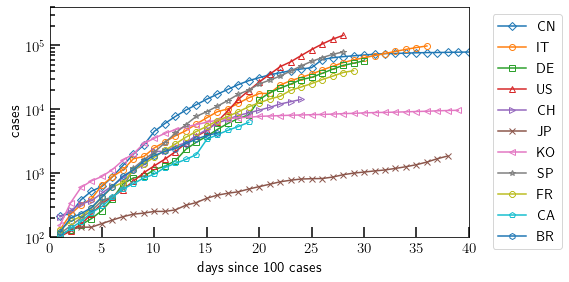

In [136]:
from matplotlib.lines import Line2D
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass
    
sizemarker=6

fig = plt.figure(figsize=(8, 4), facecolor='w', edgecolor='k')
plt.plot(np.arange(1,len(ydata_CN[ydata_CN>100])+1,1),ydata_CN[ydata_CN>100], '-D',fillstyle='none', ms=sizemarker, label=r'CN')#,linestyle='None')

plt.plot(np.arange(1,len(ydata_IT[ydata_IT>100])+1,1),ydata_IT[ydata_IT>100], '-o',fillstyle='none', ms=sizemarker,label=r'IT')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_DE[ydata_DE>100])+1,1),ydata_DE[ydata_DE>100], '-s', fillstyle='none', ms=sizemarker, label=r'DE')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_US[ydata_US>100])+1,1),ydata_US[ydata_US>100],'-^', fillstyle='none', ms=sizemarker,label=r'US')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_CH[ydata_CH>100])+1,1),ydata_CH[ydata_CH>100],'->', fillstyle='none', ms=sizemarker, label=r'CH')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_JP[ydata_JP>100])+1,1),ydata_JP[ydata_JP>100],'-x', fillstyle='none', ms=sizemarker, label=r'JP')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_KO[ydata_KO>100])+1,1),ydata_KO[ydata_KO>100], '-<',fillstyle='none', ms=sizemarker, label=r'KO')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_SP[ydata_SP>100])+1,1),ydata_SP[ydata_SP>100], '-*',fillstyle='none', ms=sizemarker, label=r'SP')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_FR[ydata_FR>100])+1,1),ydata_FR[ydata_FR>100], '-8',fillstyle='none', ms=sizemarker, label=r'FR')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_CA[ydata_CA>100])+1,1),ydata_CA[ydata_CA>100], '-p',fillstyle='none', ms=sizemarker, label=r'CA')#,linestyle='None')
plt.plot(np.arange(1,len(ydata_BR[ydata_BR>100])+1,1),ydata_BR[ydata_BR>100], '-h',fillstyle='none', ms=sizemarker, label=r'BR')#,linestyle='None')


# plt.plot(xdata-shift_KO,ydata_KO, label=r'KO', marker=markers[2], ms=5, fillstyle='none',linestyle='None')
# plt.plot(xdata_CN+36,ydata_CN, 'o', color='red',  label=r'CN (+36)', fillstyle='none')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':14},frameon=True)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r"days since 100 cases",fontsize = 15)
plt.ylabel(r"cases",fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,40)
plt.ylim(100,400000)
# plt.legend(loc='best',prop={'size':20},frameon=True)
plt.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=15,direction='in')
plt.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=15,direction='in')
fig.tight_layout(pad=1.0)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


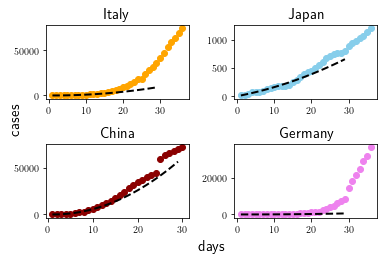

In [107]:
func = fitAlgebraic
# func = fitPowerlaw
# func = fitExp

popt_IT, pcov_IT = curve_fit(func, xdata[:10], ydata_IT[:10], x0,maxfev = 5000)
popt_DE, pcov_DE = curve_fit(func, xdata[:10], ydata_DE[:10], x0,maxfev = 5000)
popt_JP, pcov_JP = curve_fit(func, xdata[:10], ydata_JP[:10], x0,maxfev = 5000)
popt_CN, pcov_CN = curve_fit(func, xdata_CN[:10], ydata_CN[:10], x0,maxfev = 5000)

fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.plot(xdata,ydata_IT, 'o', color=coltri[2],  label=r'IT')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_IT), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Italy',fontsize = 15)
ax2 = fig.add_subplot(222)
plt.plot(xdata,ydata_JP, 'o', color=coltri[1],  label=r'JP')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_JP), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Japan',fontsize = 15)
ax3 = fig.add_subplot(223)
plt.plot(xdata_CN,ydata_CN, 'o', color=coltri[0],  label=r'CN')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_CN), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('China',fontsize = 15)
ax4 = fig.add_subplot(224)
plt.plot(xdata,ydata_DE, 'o', color='violet',  label=r'DE')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_DE), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Germany',fontsize = 15)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r"days",fontsize = 15)
plt.ylabel(r"cases",fontsize = 15)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.yscale('log')
# plt.xscale('log')
# plt.legend(loc='best',prop={'size':20},frameon=True)
# ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
# ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
fig.tight_layout(pad=1.0)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [61]:
date_CN = np.flip(china.DateRep)[20:]

979    20/01/2020
978    21/01/2020
977    22/01/2020
976    23/01/2020
975    24/01/2020
974    25/01/2020
973    26/01/2020
972    27/01/2020
971    28/01/2020
970    29/01/2020
969    30/01/2020
968    31/01/2020
967    01/02/2020
966    02/02/2020
965    03/02/2020
964    04/02/2020
963    05/02/2020
962    06/02/2020
961    07/02/2020
960    08/02/2020
959    09/02/2020
958    10/02/2020
957    11/02/2020
956    12/02/2020
955    13/02/2020
954    14/02/2020
953    15/02/2020
952    16/02/2020
951    17/02/2020
950    18/02/2020
949    19/02/2020
948    20/02/2020
947    21/02/2020
946    22/02/2020
945    23/02/2020
944    24/02/2020
943    25/02/2020
942    26/02/2020
941    27/02/2020
940    28/02/2020
939    29/02/2020
938    01/03/2020
937    02/03/2020
936    03/03/2020
935    04/03/2020
934    05/03/2020
933    06/03/2020
932    07/03/2020
931    08/03/2020
930    09/03/2020
929    10/03/2020
928    11/03/2020
927    12/03/2020
Name: DateRep, dtype: object

In [72]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
# func = fitPowerlaw

popt_CN, pcov_CN = curve_fit(func, xdata[:20], ydata_CN[:20], x0,maxfev = 5000)
popt_CN, pcov_CN

(array([ 3.04960181e+03,  1.29702824e-01, -4.58457153e+03]),
 array([[ 2.88766620e+05, -4.38189512e+00, -4.90715393e+05],
        [-4.38189512e+00,  6.72092111e-05,  7.28637003e+00],
        [-4.90715393e+05,  7.28637003e+00,  9.09852306e+05]]))

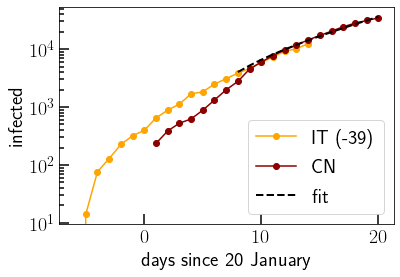

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata[:20],ydata_CN[:20], 'o-', color=coltri[0],  label=r'CN')
plt.plot(xdata[7:20], func(xdata, *popt_CN)[7:20], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 January", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [9]:
ydata_CN = np.cumsum(newcases_CN)[:]
# ydata_CN = np.cumsum(newcases_CN)[20:]
xdata_CN = np.arange(1,len(ydata_CN)+1,1)
xdata_CN,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74]),
 array([   27,    27,    27,    44,    44,    59,    59,    59,    59,
           59,    59,    59,    59,    59,    59,    59,    59,    63,
           80,   216,   235,   386,   526,   623,   882,  1323,  1988,
         2775,  4528,  5994,  7734,  9714, 11809, 14399, 17211, 20448,
        24320, 28047, 31207, 34625, 37232, 40206, 42696, 44724, 59865,
        64021, 66559, 68566, 70618, 72508, 74258, 74652, 75543, 76369,
        77016, 77234, 77749, 78159, 78598, 78927, 79355, 79929, 80134,
        80261, 80380, 80497, 80667, 80768, 80814, 80859, 80879, 80908,
        80932, 80954]))

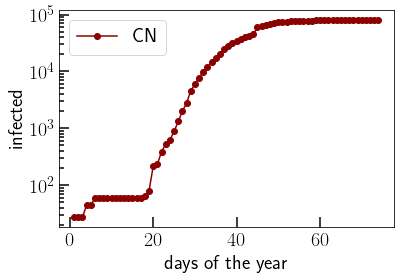

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata_CN[:],ydata_CN[:], 'o-', color=coltri[0],  label=r'CN')
# plt.plot(xdata[7:20], func(xdata, *popt_CN)[7:20], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days of the year", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [ ]:
folder = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
data = pd.read_csv(folder+'time_series_19-covid-Confirmed.csv',sep=',') 
data.rename(columns={'Province/State': 'State', 'Country/Region': 'Country'}, inplace=True)
italy = data[data.Country =='Italy']
italy